# Module 12: Machine Learning with Python

Our goal will be to create a machine learning algorithm that can tell who lived and who died.

[The kaggle contest and dataset](https://www.kaggle.com/competitions/titanic/data)

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

If you want to see all rows when calling a dataframe use the code below:

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
train = pd.read_csv('data/titanic_contest_data/train.csv')
test = pd.read_csv('data/titanic_contest_data/test.csv')

In [4]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


**Pclass:** A proxy for socio-economic status (SES)  
1st = Upper   
2nd = Middle  
3rd = Lower  

**Age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  

**SibSp:** The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

**Parch:** The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

**Embarked** The city from which the passengers embarked.  
C = Cherbourg,   
Q = Queenstown,   
S = Southampton

In [5]:
sns.set_style('ticks')
sns.set_context('talk')

In [6]:
# To set size for all visualizations use the following:

sns.set(rc={'figure.figsize': (7,7)})

<AxesSubplot:xlabel='Survived', ylabel='count'>

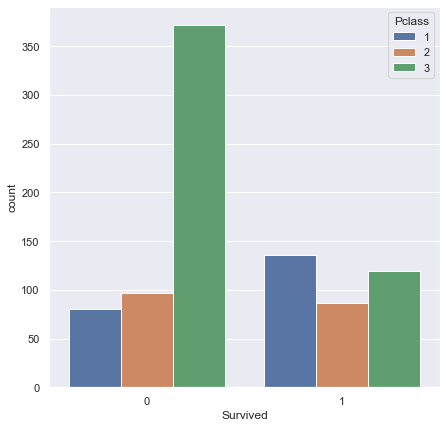

In [7]:
# To set size for a single visualization use the following:
# plt.figure(figsize=(7,7))

sns.countplot(x='Survived', hue = 'Pclass', data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

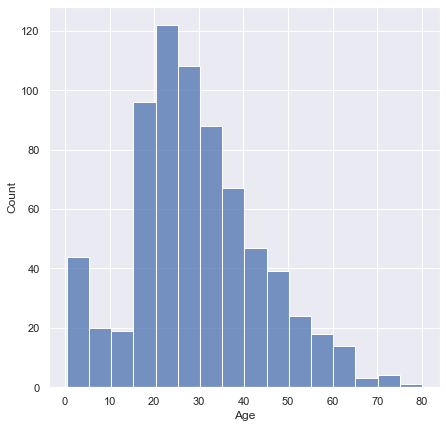

In [8]:
sns.histplot(train['Age'].dropna(), kde=False, bins=16)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

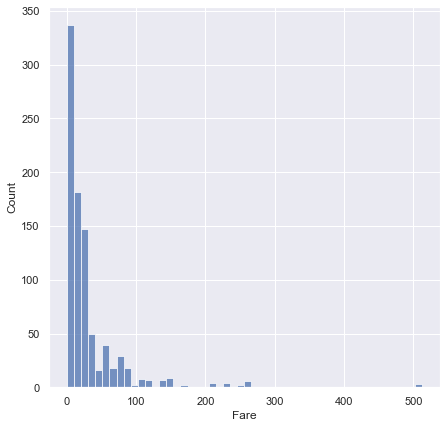

In [9]:
#train['Fare'].plot.hist(bins=40, figsize=(10,4)) 
sns.histplot(train['Fare'].dropna(), kde=False, bins= 50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

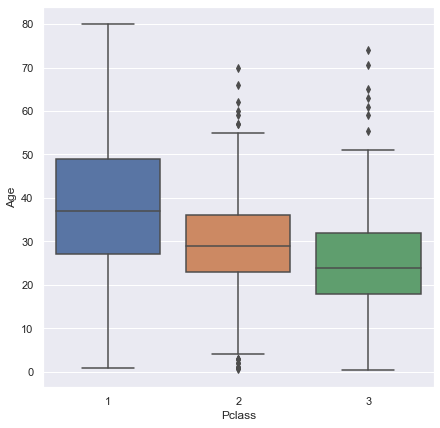

In [10]:
sns.boxplot(x='Pclass', y='Age', data=train)

# lets make heat map

1. Create correlation matrix

In [11]:
correlation_matrix = train.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


2. Create heatmap

<AxesSubplot:>

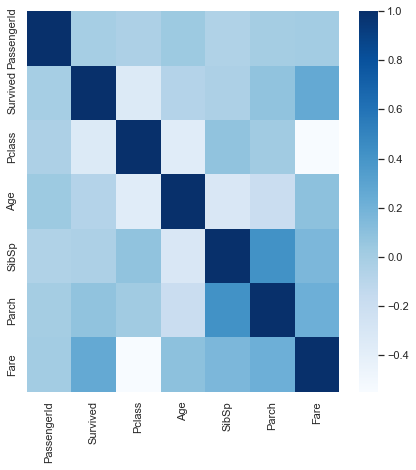

In [12]:
sns.heatmap(correlation_matrix, cmap = "Blues")

3. Do both in one line

<AxesSubplot:>

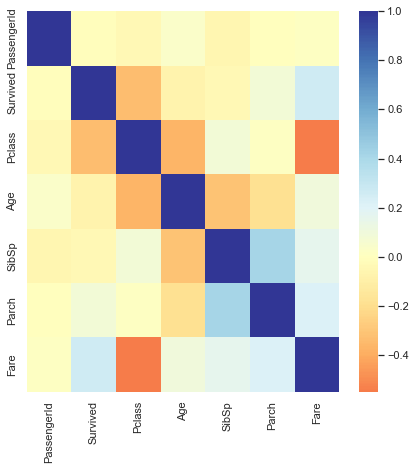

In [13]:
sns.heatmap(train.corr(), cmap ="RdYlBu", center = 0) 
# notice the selection of the center at zero

- Consider how every column correlates with the **"Survived"** column.
- Contemplate both the positive and the negative correlations
- Drop insignificant features

#### Drop unwanted columns

In [14]:
train = train.drop(['Name','SibSp','Parch','Ticket','Fare', 'Cabin'], axis=1)
test = test.drop(['Name','SibSp','Parch','Ticket','Fare', 'Cabin'], axis=1)

#### Convert 'Sex' into numeric

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Embarked     889 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


#### Drop Nulls

In [16]:
train = train.dropna()

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   Embarked     712 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 38.9+ KB


In [18]:
test = test.dropna()

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  332 non-null    int64  
 1   Pclass       332 non-null    int64  
 2   Sex          332 non-null    object 
 3   Age          332 non-null    float64
 4   Embarked     332 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 15.6+ KB


#### Convert Sex to Numeric

In [20]:
genders = {"female": 0, "male": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

#### Convert Embaked into numeric

In [21]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [22]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,1,22.0,0


In [23]:
test.head(1)

,PassengerId,Pclass,Sex,Age,Embarked
0,892,3,1,34.5,2


# Building Machine Learning Models

The dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [24]:
X_train = train.drop(["Survived","PassengerId"], axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1)#.copy()

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   Embarked  712 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 27.8 KB


In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    332 non-null    int64  
 1   Sex       332 non-null    int64  
 2   Age       332 non-null    float64
 3   Embarked  332 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 13.0 KB


# Logistic Regression:

#### Creating the Model

In [27]:
#Alias Method and Select Number of Max Iterations

lr = LogisticRegression(max_iter=1000)

# Fit / Train the model on your training data
lr.fit(X_train, Y_train)

# Evaluate the model
lr.score(X_train, Y_train)
lr_score = round(lr.score(X_train, Y_train) * 100, 2)
lr_score

79.35

#### Using the Model

In [28]:
#Predict values in known column
lr.predict(X_train)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [29]:
#Compare predicted values to known values

lrcm = confusion_matrix(lr.predict(X_train),Y_train)
lrcm

array([[358,  81],
       [ 66, 207]])

In [30]:
lr.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

#### Use the model in new contexts, Jack and Rose

In [31]:
# Create a dictionary containing the data you need, with correct number and order of columns

passengers = {'pclass': [3, 1], 'sex': [1, 0],'age': [22, 17],  'embarked': [1,1]}

# Turn that dictionary into a dataframe
jackandrose = pd.DataFrame.from_dict(passengers)

# Call the dataframe
jackandrose

,pclass,sex,age,embarked
0,3,1,22,1
1,1,0,17,1


In [32]:
# Use the model on a dataframe

lr_survival_prediction = lr.predict(jackandrose)
print (lr_survival_prediction)

[0 1]


# Linear Support Vector Machine:

In [33]:
# Alias Method and Select Number of Max Iterations
lsvc = LinearSVC(max_iter=1000000)

# Fit / Train the model on your training data
lsvc.fit(X_train, Y_train)

# Evaluate the model
lsvc.score(X_train, Y_train)

0.7907303370786517

In [34]:
lsvc_score = round(lsvc.score(X_train, Y_train) * 100, 2)
lsvc_score

79.07

In [35]:
#Predict values in known column

lsvc.predict(X_train)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [36]:
#Compare predicted values to known values

lscvcm = confusion_matrix(lsvc.predict(X_train),Y_train)
lscvcm

array([[361,  86],
       [ 63, 202]])

In [37]:
lsvc.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [38]:
lsvc_survival_prediction = lsvc.predict(jackandrose)
print (lsvc_survival_prediction)

[0 1]


# Decision Tree

In [39]:
# Alias Method 
dt = DecisionTreeClassifier() 

# Fit / Train the model on your training data
dt.fit(X_train, Y_train) 

# Evaluate the model
dt.score(X_train, Y_train)

0.9115168539325843

In [40]:
dt_score = round(dt.score(X_train, Y_train) * 100, 2)
dt_score

91.15

In [41]:
# Predict values in known column
dt.predict(X_test)  

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,

In [42]:
# Compare predicted values to known values
dtcm = confusion_matrix(dt.predict(X_train),Y_train)
dtcm

array([[413,  52],
       [ 11, 236]])

In [43]:
survival_prediction = dt.predict(jackandrose)
print (survival_prediction)

[0 1]


# **Random Forest**

In [44]:
# Alias Method and Select Number of Max Iterations
rf = RandomForestClassifier(n_estimators=100)

# Fit / Train the model on your training data
rf.fit(X_train, Y_train)

# Evaluate the model
rf_score = rf.score(X_train, Y_train)
rf_score

0.9115168539325843

In [45]:
rf_score = round(rf.score(X_train, Y_train) * 100, 2)
rf_score

91.15

In [46]:
# Predict values in known column
rf.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,

In [47]:
# Compare predicted values to known values
rfcm = confusion_matrix(rf.predict(X_train),Y_train)
rfcm

array([[402,  41],
       [ 22, 247]])

In [48]:
survival_prediction = rf.predict(jackandrose)
print (survival_prediction)

[0 1]


# Comparing Models

In [49]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines',
              'Decision Tree','Random Forest'], 
              
    'Score': [lr_score, lsvc_score, dt_score, 
              rf_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
91.15,Decision Tree
91.15,Random Forest
79.35,Logistic Regression
79.07,Support Vector Machines


In [50]:
lrcm

array([[358,  81],
       [ 66, 207]])

In [51]:
lscvcm

array([[361,  86],
       [ 63, 202]])

In [52]:
dtcm

array([[413,  52],
       [ 11, 236]])

In [53]:
rfcm

array([[402,  41],
       [ 22, 247]])